## Adnan Altukleh & Abdulkarim Dawalibi

In [91]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import time
import math
import seaborn as sns

In [92]:
#columns name for the data set
colname=["word_freq_make",
"word_freq_address",
"word_freq_all",
"word_freq_3d",
"word_freq_our",
"word_freq_over",
"word_freq_remove",
"word_freq_internet",
"word_freq_orders",
"word_freq_mail",
"word_freq_receive",
"word_freq_will",
"word_freq_people",
"word_freq_report",
"word_freq_addresses",
"word_freq_free",
"word_freq_business",
"word_freq_email",
"word_freq_you",
"word_freq_credit",
"word_freq_your",
"word_freq_font",
"word_freq_000",
"word_freq_money",
"word_freq_hp",
"word_freq_hpl",
"word_freq_george",
"word_freq_650",
"word_freq_lab",
"word_freq_labs",
"word_freq_telnet",
"word_freq_857",
"word_freq_data",
"word_freq_415",
"word_freq_85",
"word_freq_technology",
"word_freq_1999",
"word_freq_parts",
"word_freq_pm",
"word_freq_direct",
"word_freq_cs",
"word_freq_meeting",
"word_freq_original",
"word_freq_project",
"word_freq_re",
"word_freq_edu",
"word_freq_table",
"word_freq_conference",
"char_freq_",
"char_freq_(",
"char_freq_[",
"char_freq_!",
"char_freq_$", 
"char_freq_#",
"capital_run_length_average",
"capital_run_length_longest",
"capital_run_length_total",
"is_spam"]

In [93]:
#data reading
data=pd.read_csv("spambase.csv",names=colname)

In [94]:
#droping duplicated instances
data=data.drop_duplicates()

In [95]:
#how many rows left
data.shape

(4210, 58)

In [96]:
#function to discretaiz the data
def discrate(data_fit,data_trans,n_bin,strate):
    dtrans=KBinsDiscretizer(n_bins=n_bin,encode="ordinal",strategy=strate)
    data_t=dtrans.fit(data_fit)
    d_trans1=data_t.transform(data_fit)
    d_trans2=data_t.transform(data_trans)
    return d_trans1,d_trans2

In [97]:
#12.4 table
table_accuracy=pd.DataFrame({"Fold":[i for i in range(1,11,1)],"Naive Bayes":[0 for i in range(1,11,1)],"Naive Bayes D":[0 for i in range(1,11,1)],"Random Forest":[0 for i in range(1,11,1)],"Random Forest D":[0 for i in range(1,11,1)],"KNN":[0 for i in range(1,11,1)],"KNN D":[0 for i in range(1,11,1)],})
table_accuracy.loc[len(table_accuracy)]=["avg",0,0,0,0,0,0]
table_accuracy.loc[len(table_accuracy)]=["stdev",0,0,0,0,0,0]
table_accuracy

,Fold,Naive Bayes,Naive Bayes D,Random Forest,Random Forest D,KNN,KNN D
0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0
2,3,0,0,0,0,0,0
3,4,0,0,0,0,0,0
4,5,0,0,0,0,0,0
5,6,0,0,0,0,0,0
6,7,0,0,0,0,0,0
7,8,0,0,0,0,0,0
8,9,0,0,0,0,0,0
9,10,0,0,0,0,0,0


In [98]:
#12.4 table
table_time=pd.DataFrame({"Fold":[i for i in range(1,11,1)],"Naive Bayes":[0 for i in range(1,11,1)],"Naive Bayes D":[0 for i in range(1,11,1)],"Random Forest":[0 for i in range(1,11,1)],"Random Forest D":[0 for i in range(1,11,1)],"KNN":[0 for i in range(1,11,1)],"KNN D":[0 for i in range(1,11,1)]})
table_time.loc[len(table_time)]=["avg",0,0,0,0,0,0]
table_time.loc[len(table_time)]=["stdev",0,0,0,0,0,0]
table_time

,Fold,Naive Bayes,Naive Bayes D,Random Forest,Random Forest D,KNN,KNN D
0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0
2,3,0,0,0,0,0,0
3,4,0,0,0,0,0,0
4,5,0,0,0,0,0,0
5,6,0,0,0,0,0,0
6,7,0,0,0,0,0,0
7,8,0,0,0,0,0,0
8,9,0,0,0,0,0,0
9,10,0,0,0,0,0,0


In [99]:
#12.4 table
table_Fmeasure=pd.DataFrame({"Fold":[i for i in range(1,11,1)],"Naive Bayes":[0 for i in range(1,11,1)],"Naive Bayes D":[0 for i in range(1,11,1)],"Random Forest":[0 for i in range(1,11,1)],"Random Forest D":[0 for i in range(1,11,1)],"KNN":[0 for i in range(1,11,1)],"KNN D":[0 for i in range(1,11,1)]})
table_Fmeasure.loc[len(table_Fmeasure)]=["avg",0,0,0,0,0,0]
table_Fmeasure.loc[len(table_Fmeasure)]=["stdev",0,0,0,0,0,0]
table_Fmeasure

,Fold,Naive Bayes,Naive Bayes D,Random Forest,Random Forest D,KNN,KNN D
0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0
2,3,0,0,0,0,0,0
3,4,0,0,0,0,0,0
4,5,0,0,0,0,0,0
5,6,0,0,0,0,0,0
6,7,0,0,0,0,0,0
7,8,0,0,0,0,0,0
8,9,0,0,0,0,0,0
9,10,0,0,0,0,0,0


___________________________________________________________________________________________________________

### Impleminting the different algorithms and computing: accuracy, time and F-measure

In [100]:
#x data without is spam column
#y just is spam column
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [101]:
#(Cross-validation)
skf = StratifiedKFold(n_splits=10)
algoritm_1 = MultinomialNB()
algoritm_2 = RandomForestClassifier()
algoritm_3 = KNeighborsClassifier()

In [102]:
#Algorithms proess
row=0
for train, test in skf.split(x, y):
    x_train_fold, x_test_fold = x.iloc[train], x.iloc[test] 
    y_train_fold, y_test_fold = y.iloc[train], y.iloc[test]
    #________________ Naive Bayes
    s_time1=time.time()
    algoritm_1.fit(x_train_fold, y_train_fold)
    e_time1=time.time()
    pred1=algoritm_1.predict(x_test_fold)
    #_______________ Random forest
    s_time2=time.time()
    algoritm_2.fit(x_train_fold, y_train_fold)
    e_time2=time.time()
    pred2=algoritm_2.predict(x_test_fold)
    #_______________ KNN
    s_time3=time.time()
    algoritm_3.fit(x_train_fold, y_train_fold)
    e_time3=time.time()
    pred3=algoritm_3.predict(x_test_fold)
    #________________
    table_accuracy.loc[row,"Naive Bayes"]=accuracy_score(y_test_fold,pred1)
    table_Fmeasure.loc[row,"Naive Bayes"]=f1_score(y_test_fold,pred1)
    table_time.loc[row,"Naive Bayes"]=e_time1-s_time1
    #________________
    table_accuracy.loc[row,"Random Forest"]=accuracy_score(y_test_fold,pred2)
    table_Fmeasure.loc[row,"Random Forest"]=f1_score(y_test_fold,pred2)
    table_time.loc[row,"Random Forest"]=e_time2-s_time2
    #________________
    table_accuracy.loc[row,"KNN"]=accuracy_score(y_test_fold,pred3)
    table_Fmeasure.loc[row,"KNN"]=f1_score(y_test_fold,pred3)
    table_time.loc[row,"KNN"]=e_time3-s_time3
    row+=1

In [103]:
#Algorithms proess with data discretization
row=0
for train, test in skf.split(x, y):
    x_train_fold, x_test_fold = x.iloc[train], x.iloc[test] 
    y_train_fold, y_test_fold = y.iloc[train], y.iloc[test]
    x_train_fold,x_test_fold = discrate(x_train_fold,x_test_fold,8,"kmeans")
    #________________ Naive Bayes
    s_time1=time.time()
    algoritm_1.fit(x_train_fold, y_train_fold)
    e_time1=time.time()
    pred1=algoritm_1.predict(x_test_fold)
    #_______________ Random forest
    s_time2=time.time()
    algoritm_2.fit(x_train_fold, y_train_fold)
    e_time2=time.time()
    pred2=algoritm_2.predict(x_test_fold)
    #_______________ KNN
    s_time3=time.time()
    algoritm_3.fit(x_train_fold, y_train_fold)
    e_time3=time.time()
    pred3=algoritm_3.predict(x_test_fold)
    #________________
    table_accuracy.loc[row,"Naive Bayes D"]=accuracy_score(y_test_fold,pred1)
    table_Fmeasure.loc[row,"Naive Bayes D"]=f1_score(y_test_fold,pred1)
    table_time.loc[row,"Naive Bayes D"]=e_time1-s_time1
    #________________
    table_accuracy.loc[row,"Random Forest D"]=accuracy_score(y_test_fold,pred2)
    table_Fmeasure.loc[row,"Random Forest D"]=f1_score(y_test_fold,pred2)
    table_time.loc[row,"Random Forest D"]=e_time2-s_time2
    #________________
    table_accuracy.loc[row,"KNN D"]=accuracy_score(y_test_fold,pred3)
    table_Fmeasure.loc[row,"KNN D"]=f1_score(y_test_fold,pred3)
    table_time.loc[row,"KNN D"]=e_time3-s_time3
    row+=1

In [104]:
#computing and appending mean to the tables
table_accuracy.loc[10,"Naive Bayes"]=table_accuracy["Naive Bayes"].iloc[:9].mean()
table_accuracy.loc[10,"Naive Bayes D"]=table_accuracy["Naive Bayes D"].iloc[:9].mean()
table_accuracy.loc[10,"Random Forest"]=table_accuracy["Random Forest"].iloc[:9].mean()
table_accuracy.loc[10,"Random Forest D"]=table_accuracy["Random Forest D"].iloc[:9].mean()
table_accuracy.loc[10,"KNN"]=table_accuracy["KNN"].iloc[:9].mean()
table_accuracy.loc[10,"KNN D"]=table_accuracy["KNN D"].iloc[:9].mean()
#_______________________________
table_Fmeasure.loc[10,"Naive Bayes"]=table_Fmeasure["Naive Bayes"].iloc[:9].mean()
table_Fmeasure.loc[10,"Naive Bayes D"]=table_Fmeasure["Naive Bayes D"].iloc[:9].mean()
table_Fmeasure.loc[10,"Random Forest"]=table_Fmeasure["Random Forest"].iloc[:9].mean()
table_Fmeasure.loc[10,"Random Forest D"]=table_Fmeasure["Random Forest D"].iloc[:9].mean()
table_Fmeasure.loc[10,"KNN"]=table_Fmeasure["KNN"].iloc[:9].mean()
table_Fmeasure.loc[10,"KNN D"]=table_Fmeasure["KNN D"].iloc[:9].mean()
#________________________________
table_time.loc[10,"Naive Bayes"]=table_time["Naive Bayes"].iloc[:9].mean()
table_time.loc[10,"Naive Bayes D"]=table_time["Naive Bayes D"].iloc[:9].mean()
table_time.loc[10,"Random Forest"]=table_time["Random Forest"].iloc[:9].mean()
table_time.loc[10,"Random Forest D"]=table_time["Random Forest D"].iloc[:9].mean()
table_time.loc[10,"KNN"]=table_time["KNN"].iloc[:9].mean()
table_time.loc[10,"KNN D"]=table_time["KNN D"].iloc[:9].mean()

In [105]:
#computing and appending stdev to the tables

table_accuracy.loc[11,"Naive Bayes"]=table_accuracy["Naive Bayes"].iloc[:9].std()
table_accuracy.loc[11,"Naive Bayes D"]=table_accuracy["Naive Bayes D"].iloc[:9].std()
table_accuracy.loc[11,"Random Forest"]=table_accuracy["Random Forest"].iloc[:9].std()
table_accuracy.loc[11,"Random Forest D"]=table_accuracy["Random Forest D"].iloc[:9].std()
table_accuracy.loc[11,"KNN"]=table_accuracy["KNN"].iloc[:9].std()
table_accuracy.loc[11,"KNN D"]=table_accuracy["KNN D"].iloc[:9].std()
#_______________________________
table_Fmeasure.loc[11,"Naive Bayes"]=table_Fmeasure["Naive Bayes"].iloc[:9].std()
table_Fmeasure.loc[11,"Naive Bayes D"]=table_Fmeasure["Naive Bayes D"].iloc[:9].std()
table_Fmeasure.loc[11,"Random Forest"]=table_Fmeasure["Random Forest"].iloc[:9].std()
table_Fmeasure.loc[11,"Random Forest D"]=table_Fmeasure["Random Forest D"].iloc[:9].std()
table_Fmeasure.loc[11,"KNN"]=table_Fmeasure["KNN"].iloc[:9].std()
table_Fmeasure.loc[11,"KNN D"]=table_Fmeasure["KNN D"].iloc[:9].std()
#________________________________
table_time.loc[11,"Naive Bayes"]=table_time["Naive Bayes"].iloc[:9].std()
table_time.loc[11,"Naive Bayes D"]=table_time["Naive Bayes D"].iloc[:9].std()
table_time.loc[11,"Random Forest"]=table_time["Random Forest"].iloc[:9].std()
table_time.loc[11,"Random Forest D"]=table_time["Random Forest D"].iloc[:9].std()
table_time.loc[11,"KNN"]=table_time["KNN"].iloc[:9].std()
table_time.loc[11,"KNN D"]=table_time["KNN D"].iloc[:9].std()

In [106]:
table_accuracy

,Fold,Naive Bayes,Naive Bayes D,Random Forest,Random Forest D,KNN,KNN D
0,1,0.798100,0.904988,0.947743,0.926366,0.750594,0.857482
1,2,0.790974,0.921615,0.952494,0.942993,0.764846,0.900238
2,3,0.800475,0.919240,0.931116,0.933492,0.764846,0.909739
3,4,0.821853,0.928741,0.950119,0.940618,0.807601,0.885986
4,5,0.828979,0.916865,0.959620,0.947743,0.802850,0.902613
5,6,0.800475,0.895487,0.952494,0.914489,0.800475,0.888361
6,7,0.819477,0.928741,0.961995,0.950119,0.798100,0.893112
7,8,0.821853,0.907363,0.969121,0.947743,0.826603,0.895487
8,9,0.660333,0.662708,0.883610,0.855107,0.710214,0.814727
9,10,0.762470,0.750594,0.855107,0.881235,0.762470,0.790974


In [107]:
table_Fmeasure

,Fold,Naive Bayes,Naive Bayes D,Random Forest,Random Forest D,KNN,KNN D
0,1,0.736842,0.888889,0.932927,0.905199,0.680851,0.820359
1,2,0.717949,0.907563,0.939759,0.927273,0.702703,0.875000
2,3,0.734177,0.904494,0.909091,0.914110,0.691589,0.886905
3,4,0.766355,0.916201,0.935780,0.923077,0.742857,0.857143
4,5,0.770701,0.900285,0.948949,0.934132,0.756598,0.876877
5,6,0.742331,0.879121,0.941176,0.895954,0.751479,0.870523
6,7,0.756410,0.914773,0.951515,0.935385,0.728435,0.868805
7,8,0.758842,0.888252,0.960725,0.932099,0.772586,0.865031
8,9,0.632391,0.683036,0.863510,0.833787,0.668478,0.778409
9,10,0.696970,0.724409,0.814590,0.841772,0.700599,0.736527


In [108]:
table_time

,Fold,Naive Bayes,Naive Bayes D,Random Forest,Random Forest D,KNN,KNN D
0,1,0.008023,0.000000,1.045645,0.605250,0.008010,0.000000
1,2,0.008000,0.000000,0.746190,0.532594,0.000000,0.008000
2,3,0.010030,0.000000,1.123955,0.906562,0.000000,0.007013
3,4,0.008013,0.000000,1.264646,0.549561,0.002036,0.000000
4,5,0.016027,0.000000,1.291133,0.598589,0.009545,0.000000
5,6,0.008018,0.008014,1.181134,0.589941,0.007991,0.000000
6,7,0.007998,0.002697,1.274775,0.523107,0.008000,0.000000
7,8,0.007997,0.005858,1.192497,0.494294,0.000000,0.000000
8,9,0.008003,0.000000,1.182373,0.541803,0.007998,0.000000
9,10,0.008008,0.000000,1.182125,0.525805,0.008002,0.000000


<AxesSubplot: >

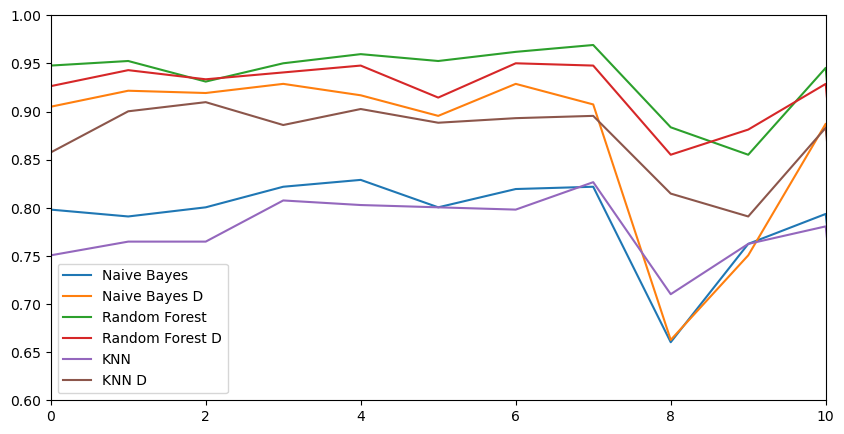

In [109]:
#poltin accuracy table
table_accuracy.plot.line(xlim=[0,10],ylim=[0.6,1],figsize=(10,5))

<AxesSubplot: >

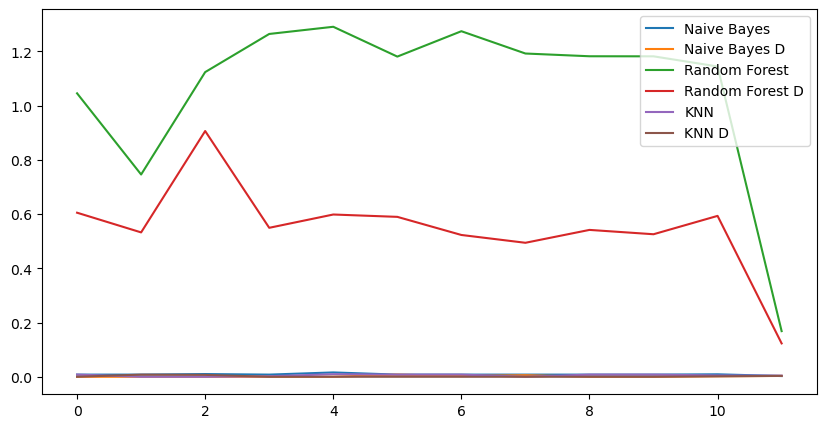

In [110]:
table_time.plot.line(figsize=(10,5))

<AxesSubplot: >

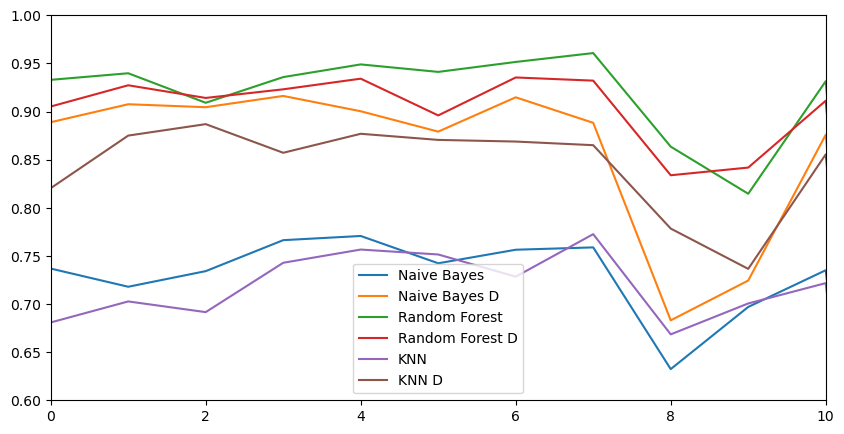

In [111]:
table_Fmeasure.plot.line(xlim=[0,10],ylim=[0.6,1],figsize=(10,5))

_______________________________________________________________

### Friedmans and Nemenyi test

In [112]:
#choosing the best preforming data between data Disctaiz or not
table_fried_ac=table_accuracy.loc[:10,["Fold","Naive Bayes D","Random Forest","KNN D"]]
table_fried_fme=table_Fmeasure.loc[:10,["Fold","Naive Bayes D","Random Forest","KNN D"]]
table_fried_ti=table_time.loc[:10,["Fold","Naive Bayes D","Random Forest","KNN D"]]

In [113]:
table_fried_ti.iloc[:,1:]
table_fried_ti.iloc[:-1, 1:]


,Naive Bayes D,Random Forest,KNN D
0,0.000000,1.045645,0.000000
1,0.000000,0.746190,0.008000
2,0.000000,1.123955,0.007013
3,0.000000,1.264646,0.000000
4,0.000000,1.291133,0.000000
5,0.008014,1.181134,0.000000
6,0.002697,1.274775,0.000000
7,0.005858,1.192497,0.000000
8,0.000000,1.182373,0.000000
9,0.000000,1.182125,0.000000


In [114]:
#friedmastest
#_______
#rank the data an save it in a data frame
rank_fried_ti=table_fried_ti.iloc[:-1, 1:].rank(axis=1,ascending=True)
rank_fried_ac=table_fried_ac.iloc[:-1, 1:].rank(axis=1,ascending=True)
rank_fried_fme=table_fried_fme.iloc[:-1, 1:].rank(axis=1,ascending=True)
#_____
#computing friedman test
for column in table_fried_ti.iloc[:,1:]:
    table_fried_ti[column] = table_fried_ti[column].round(4).astype(str)+ ' ' + '('+ rank_fried_ti[column].astype(str) + ')'
    table_fried_ac[column] = table_fried_ac[column].round(4).astype(str)+ ' ' + '('+ rank_fried_ac[column].astype(str) + ')'
    table_fried_fme[column] = table_fried_fme[column].round(4).astype(str)+ ' ' + '('+ rank_fried_fme[column].astype(str) + ')'
    table_fried_ti.loc[len(rank_fried_fme),column]=round(rank_fried_ti[column].mean(),2)
    table_fried_ac.loc[len(rank_fried_fme),column]=round(rank_fried_ac[column].mean(),2)
    table_fried_fme.loc[len(rank_fried_fme),column]=round(rank_fried_fme[column].mean(),2)
rank_fried_ac

,Naive Bayes D,Random Forest,KNN D
0,2.0,3.0,1.0
1,2.0,3.0,1.0
2,2.0,3.0,1.0
3,2.0,3.0,1.0
4,2.0,3.0,1.0
5,2.0,3.0,1.0
6,2.0,3.0,1.0
7,2.0,3.0,1.0
8,1.0,3.0,2.0
9,1.0,3.0,2.0


In [115]:
#changing avg to avg rank and selecting table accuracy
table_fried_ac.loc[len(table_fried_ac)-1,"Fold"]="avg rank"
table_fried_ac

,Fold,Naive Bayes D,Random Forest,KNN D
0,1,0.905 (2.0),0.9477 (3.0),0.8575 (1.0)
1,2,0.9216 (2.0),0.9525 (3.0),0.9002 (1.0)
2,3,0.9192 (2.0),0.9311 (3.0),0.9097 (1.0)
3,4,0.9287 (2.0),0.9501 (3.0),0.886 (1.0)
4,5,0.9169 (2.0),0.9596 (3.0),0.9026 (1.0)
5,6,0.8955 (2.0),0.9525 (3.0),0.8884 (1.0)
6,7,0.9287 (2.0),0.962 (3.0),0.8931 (1.0)
7,8,0.9074 (2.0),0.9691 (3.0),0.8955 (1.0)
8,9,0.6627 (1.0),0.8836 (3.0),0.8147 (2.0)
9,10,0.7506 (1.0),0.8551 (3.0),0.791 (2.0)


In [116]:
#changing avg to avg rank and selecting table time
table_fried_ti.loc[len(table_fried_ti)-1,"Fold"]="avg rank"
table_fried_ti

,Fold,Naive Bayes D,Random Forest,KNN D
0,1,0.0 (1.5),1.0456 (3.0),0.0 (1.5)
1,2,0.0 (1.0),0.7462 (3.0),0.008 (2.0)
2,3,0.0 (1.0),1.124 (3.0),0.007 (2.0)
3,4,0.0 (1.5),1.2646 (3.0),0.0 (1.5)
4,5,0.0 (1.5),1.2911 (3.0),0.0 (1.5)
5,6,0.008 (2.0),1.1811 (3.0),0.0 (1.0)
6,7,0.0027 (2.0),1.2748 (3.0),0.0 (1.0)
7,8,0.0059 (2.0),1.1925 (3.0),0.0 (1.0)
8,9,0.0 (1.5),1.1824 (3.0),0.0 (1.5)
9,10,0.0 (1.5),1.1821 (3.0),0.0 (1.5)


In [117]:
#changing avg to avg rank and selecting table F-measur
table_fried_fme.loc[len(table_fried_fme)-1,"Fold"]="avg rank"
table_fried_fme

,Fold,Naive Bayes D,Random Forest,KNN D
0,1,0.8889 (2.0),0.9329 (3.0),0.8204 (1.0)
1,2,0.9076 (2.0),0.9398 (3.0),0.875 (1.0)
2,3,0.9045 (2.0),0.9091 (3.0),0.8869 (1.0)
3,4,0.9162 (2.0),0.9358 (3.0),0.8571 (1.0)
4,5,0.9003 (2.0),0.9489 (3.0),0.8769 (1.0)
5,6,0.8791 (2.0),0.9412 (3.0),0.8705 (1.0)
6,7,0.9148 (2.0),0.9515 (3.0),0.8688 (1.0)
7,8,0.8883 (2.0),0.9607 (3.0),0.865 (1.0)
8,9,0.683 (1.0),0.8635 (3.0),0.7784 (2.0)
9,10,0.7244 (1.0),0.8146 (3.0),0.7365 (2.0)


#### H0 : No significant difference exists between the avg ranks on the alpha level of 0.05
#### H1 : At least one significant difference exists between the avg ranks on the alpha level of 0.05

In [118]:
#friedmans test function
def friedmans_test(n,rank_avgs):
    rank_mean=rank_avgs.mean()
    summ=0
    for i in rank_avgs:
        summ=math.pow((i-rank_mean),2)+summ
    return summ *n

In [119]:
#the sum of squared differences function
def squared_differences(lis,n,k,rank_avgs):
    rank_mean=rank_avgs.mean()
    i_j=0
    for i in lis:
        i_j=math.pow((i-rank_mean),2)+i_j
    res=i_j*(1/(n*(k-1)))
    return res

In [120]:
#The sum of squared differences
sq_ac=squared_differences(rank_fried_ac.to_numpy().ravel(),10,3,table_fried_ac.iloc[-1:,1:].to_numpy().ravel())
sq_ti=squared_differences(rank_fried_ti.to_numpy().ravel(),10,3,table_fried_ti.iloc[-1:,1:].to_numpy().ravel())
sq_fme=squared_differences(rank_fried_fme.to_numpy().ravel(),10,3,table_fried_fme.iloc[-1:,1:].to_numpy().ravel())

In [121]:
#computing friedmans test
friedmans_value_ac=friedmans_test(10,table_fried_ac.iloc[-1:,1:].to_numpy().ravel())/sq_ac
friedmans_value_ti=friedmans_test(10,table_fried_ti.iloc[-1:,1:].to_numpy().ravel())/sq_ti
friedmans_value_fme=friedmans_test(10,table_fried_fme.iloc[-1:,1:].to_numpy().ravel())/sq_fme

In [122]:
#the critical value for k=3 and n=10 at the a=0.05 level is 7.8
#level is 7.8 Based on table in webbsite https://sixsigmastudyguide.com/friedman-non-parametric-hypothesis-test/
print("Accuracy: ",friedmans_value_ac, "Time: ",friedmans_value_ti,"F-measure: ",friedmans_value_fme)

Accuracy:  16.8 Time:  17.2 F-measure:  16.8


We reject our null hypothesis beacuse the critical value is less than the statistical value thats why we will perform Nemeyi test to locate the models with a significant difference


In [123]:
#critical difference function
def cd(n,k):
    q=2.343 #in case k=3 a= 0,05
    sq=math.sqrt(((k*(k+1))/(6*n)))
    return sq*q

In [124]:
cd_value=cd(10,3)
cd_value

1.0478214542564015

We calculate the critical difference, we get a value 1.04 therefore we will compare
the distance between first algorithm - second, the second algorithm - third and the first - third. If there is distance that is exceed the CD_value so there is a significant diffrence

In [125]:
#distance difference between naive bayes and random forest
naive_forest_ac=abs(table_fried_ac.iloc[-1:,1:].to_numpy().ravel()[0] - table_fried_ac.iloc[-1:,1:].to_numpy().ravel()[1])
naive_forest_ti=abs(table_fried_ti.iloc[-1:,1:].to_numpy().ravel()[0] - table_fried_ti.iloc[-1:,1:].to_numpy().ravel()[1])
naive_forest_fme=abs(table_fried_fme.iloc[-1:,1:].to_numpy().ravel()[0] - table_fried_fme.iloc[-1:,1:].to_numpy().ravel()[1])

In [126]:
#distance difference between naive bayes and KNN
naive_KNN_ac=abs(table_fried_ac.iloc[-1:,1:].to_numpy().ravel()[0] - table_fried_ac.iloc[-1:,1:].to_numpy().ravel()[2])
naive_KNN_ti=abs(table_fried_ti.iloc[-1:,1:].to_numpy().ravel()[0] - table_fried_ti.iloc[-1:,1:].to_numpy().ravel()[2])
naive_KNN_fme=abs(table_fried_fme.iloc[-1:,1:].to_numpy().ravel()[0] - table_fried_fme.iloc[-1:,1:].to_numpy().ravel()[2])

In [127]:
#distance difference between random forest and KNN
forest_KNN_ac=abs(table_fried_ac.iloc[-1:,1:].to_numpy().ravel()[1] - table_fried_ac.iloc[-1:,1:].to_numpy().ravel()[2])
forest_KNN_ti=abs(table_fried_ti.iloc[-1:,1:].to_numpy().ravel()[1] - table_fried_ti.iloc[-1:,1:].to_numpy().ravel()[2])
forest_KNN_fme=abs(table_fried_fme.iloc[-1:,1:].to_numpy().ravel()[1] - table_fried_fme.iloc[-1:,1:].to_numpy().ravel()[2])

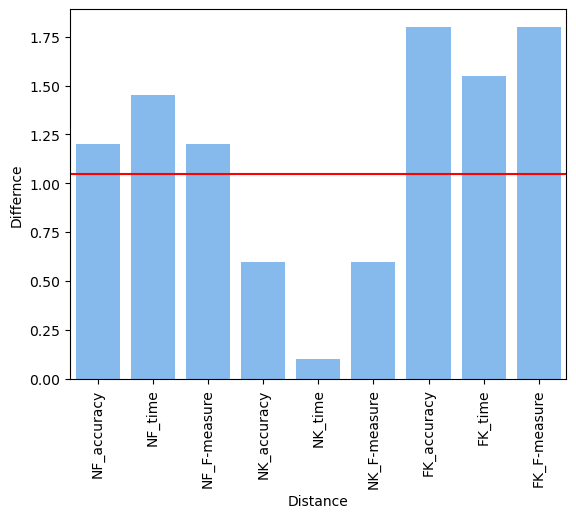

In [128]:
#ploting the distance for difference between the algorithm
# NOTE!!NF represent Naive Bayes and Random forest, NK represent Naive Bayes and KNN, FK represent Random forest and KNN
pt=pd.DataFrame({"Distance":["NF_accuracy","NF_time","NF_F-measure","NK_accuracy","NK_time","NK_F-measure","FK_accuracy","FK_time","FK_F-measure"],
"Differnce":[naive_forest_ac,naive_forest_ti,naive_forest_fme,naive_KNN_ac,naive_KNN_ti,naive_KNN_fme,forest_KNN_ac,forest_KNN_ti,forest_KNN_fme]})
graph = sns.barplot(x="Distance",y="Differnce",data=pt,color="#75bbfd")
graph.axhline(cd_value,color="red")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
plt.show()